In [214]:
from package.datasets import Sentinel2_60m, LabelDataset
from package.config.products import PRODUCTS
from torchgeo.samplers import RandomGeoSampler, GridGeoSampler
from torchgeo.datasets import IntersectionDataset, random_grid_cell_assignment
from geoai.utils import view_image, view_raster, dict_to_image
import torch
from torchgeo.samplers import RandomBatchGeoSampler, GridGeoSampler
import lightning.pytorch as pl

In [231]:
sentinel = Sentinel2_60m('data', products=PRODUCTS['train'], bands=None)

In [232]:
label = LabelDataset('masks')

In [233]:
dataset = sentinel & label

In [234]:
dataset

In [235]:
pl.seed_everything(12345678)
generator = torch.Generator().manual_seed(torch.Generator().initial_seed())
train_dataset, val_dataset, test_dataset = random_grid_cell_assignment(
    dataset, [0.7, 0.2, 0.1], grid_size=6, generator=generator)

Seed set to 12345678


In [236]:
train_sampler = RandomGeoSampler(train_dataset, 192, 800)

In [237]:
train_data = dataset[next(iter(train_sampler))]
train_data = dataset[next(iter(train_sampler))]
train_image = train_data['image']
train_label = train_data['mask']

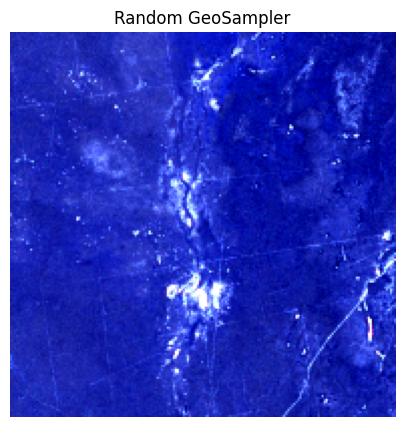

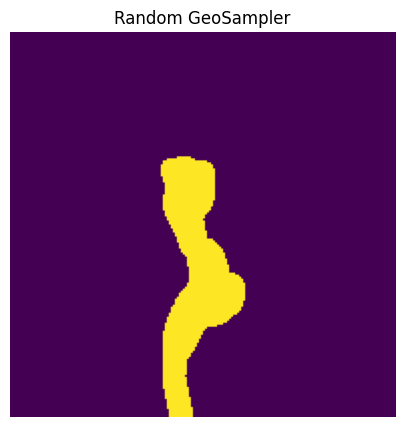

In [238]:
view_image(
    train_image, transpose=True, title="Random GeoSampler"
)
view_image(
    train_label, transpose=False, title="Random GeoSampler"
)